# Explorer - Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# auto notebook reload
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
from explorer import config
from explorer.preprocessing import parse
from explorer.visualization.distributions import plot_counts

## Explore data
We explore data that we obtained from Overture Maps.

In [4]:
df_places = pd.read_csv(config.DATA_DIR / 'raw/places.csv')
df_places.head()

,ogc_fid,wkb_geometry,id,version,update_time,sources,names,categories,confidence,websites,socials,phones,brand,addresses
0,1158,0101000020E610000063D009A183AE00409DF4BEF1B55B...,08f1fb46a3c9029603d842e6b849a37b,0,2024-06-06 00:00:00+00,"[{""property"":"""",""dataset"":""meta"",""record_id"":""...","{""primary"":""Carrefour Market"",""common"":null,""r...","{""main"":""supermarket"",""alternate"":[""beauty_and...",0.957203,"[""https://www.carrefour.fr/magasin/market-sain...","[""https://www.facebook.com/108553594074643""]","[""+33130526050""]","{""wikidata"":null,""names"":{""primary"":""Carrefour...","[{""freeform"":""ZAC De Beauplan"",""locality"":""Sai..."
1,1159,0101000020E6100000C765DCD440A300409FCFDB33A65C...,08f1fb46a2a2b14803fb05c9cb2ca3c5,0,2024-06-06 00:00:00+00,"[{""property"":"""",""dataset"":""meta"",""record_id"":""...","{""primary"":""La Clairière Paysanne"",""common"":nu...","{""main"":""education"",""alternate"":[""agriculture""...",0.863636,"[""http://laclairierepaysanne.fr""]","[""https://www.facebook.com/113119370735294""]",NaN,NaN,"[{""freeform"":""Rue Théodore Monod"",""locality"":n..."
2,1160,0101000020E61000004A65E5F27AAB0040B4C5DA84205C...,08f1fb46a3c14a9103675b4a3b3a3749,0,2024-06-06 00:00:00+00,"[{""property"":"""",""dataset"":""meta"",""record_id"":""...","{""primary"":""RHSelect"",""common"":null,""rules"":null}","{""main"":""professional_services"",""alternate"":null}",0.631300,"[""https://www.rhselect.fr/""]","[""https://www.facebook.com/619166335394718""]","[""+33130479324""]",NaN,"[{""freeform"":""18 Rue des Cèdres"",""locality"":nu..."
3,1161,0101000020E6100000E5B919C979AA0040BE0BA540B05C...,08f1fb46a06d34590309c3116af47921,0,2024-06-06 00:00:00+00,"[{""property"":"""",""dataset"":""meta"",""record_id"":""...","{""primary"":""La Place"",""common"":null,""rules"":null}","{""main"":""brewery"",""alternate"":[""restaurant"",""l...",0.957203,"[""http://www.brasserie-la-place.fr/""]","[""https://www.facebook.com/146875502039420""]","[""+33130479033""]",NaN,"[{""freeform"":""2 Place Pierre Bérégovoy"",""local..."
4,1162,0101000020E610000009E1D1C611AB00407BE8CC87B15C...,08f1fb46a06d320003926bd2c9a44bde,0,2024-06-06 00:00:00+00,"[{""property"":"""",""dataset"":""meta"",""record_id"":""...","{""primary"":""Cafe Leffe Magny les Hameaux"",""com...","{""main"":""cafe"",""alternate"":[""restaurant""]}",0.331822,NaN,"[""https://www.facebook.com/1666782333627360""]","[""+33899022492""]",NaN,"[{""freeform"":""2 Place Pierre Bérégovoy"",""local..."


Let's start by parsing the JSON columns and plotting the values they contain to see what information they hold.

JSON Column: 'sources'
Columns with cardinality > 50 will not be displayed:
record_id    129285
dtype: int64 
Plotting counts for columns: ['property', 'dataset', 'confidence']


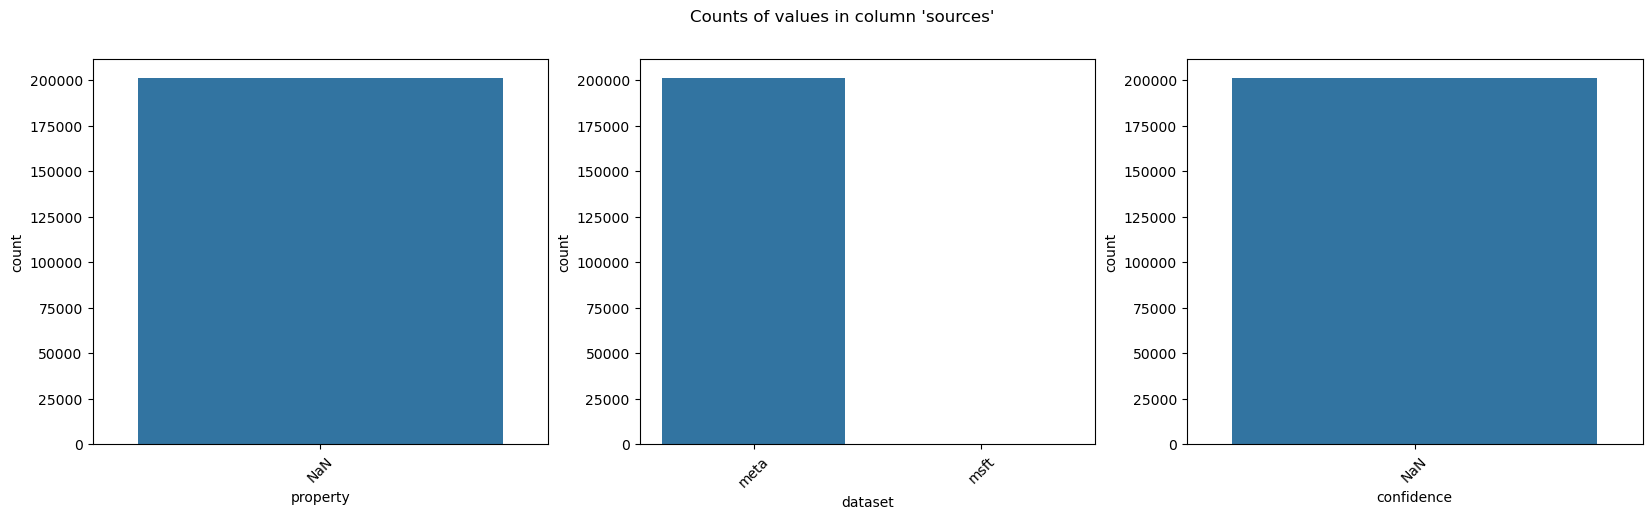

JSON Column: 'names'
Columns with cardinality > 50 will not be displayed:
primary    115629
dtype: int64 
Plotting counts for columns: ['common', 'rules']


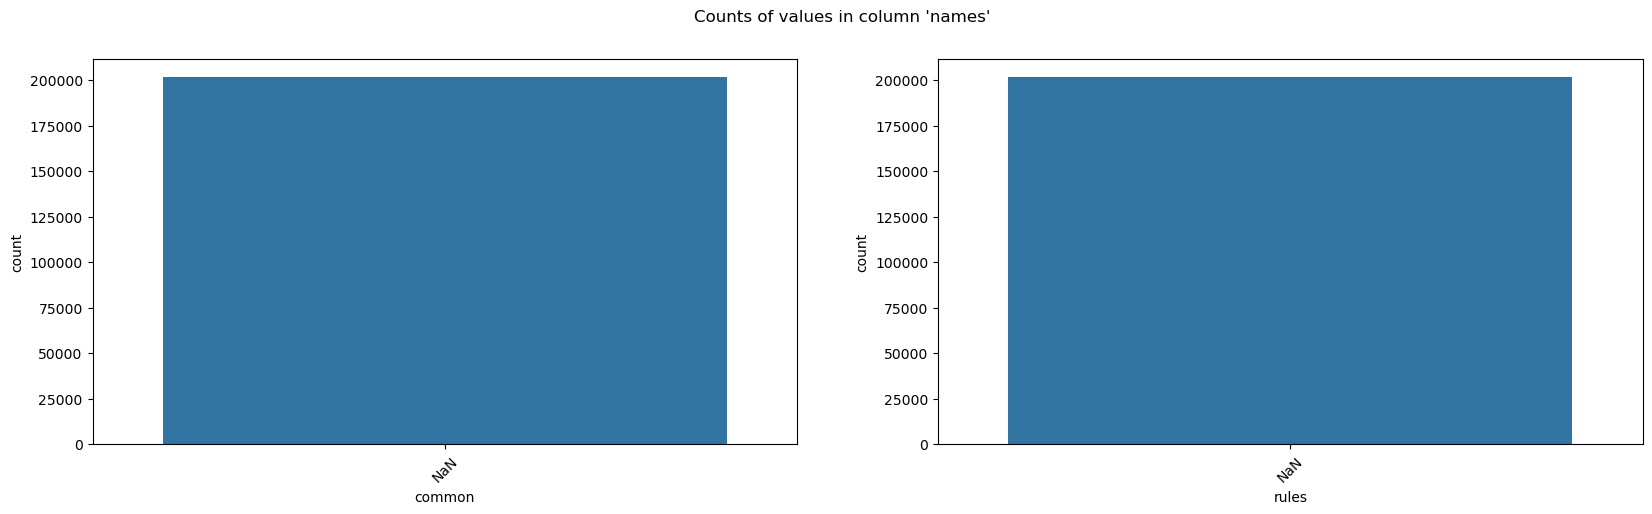

JSON Column: 'categories'
Columns with cardinality > 50 will not be displayed:
main           879
alternate_0    911
alternate_1    876
dtype: int64 
Plotting counts for columns: []
No columns to plot
JSON Column: 'addresses'
Columns with cardinality > 50 will not be displayed:
freeform    77431
locality     1085
postcode     1186
country        75
dtype: int64 
Plotting counts for columns: ['region']


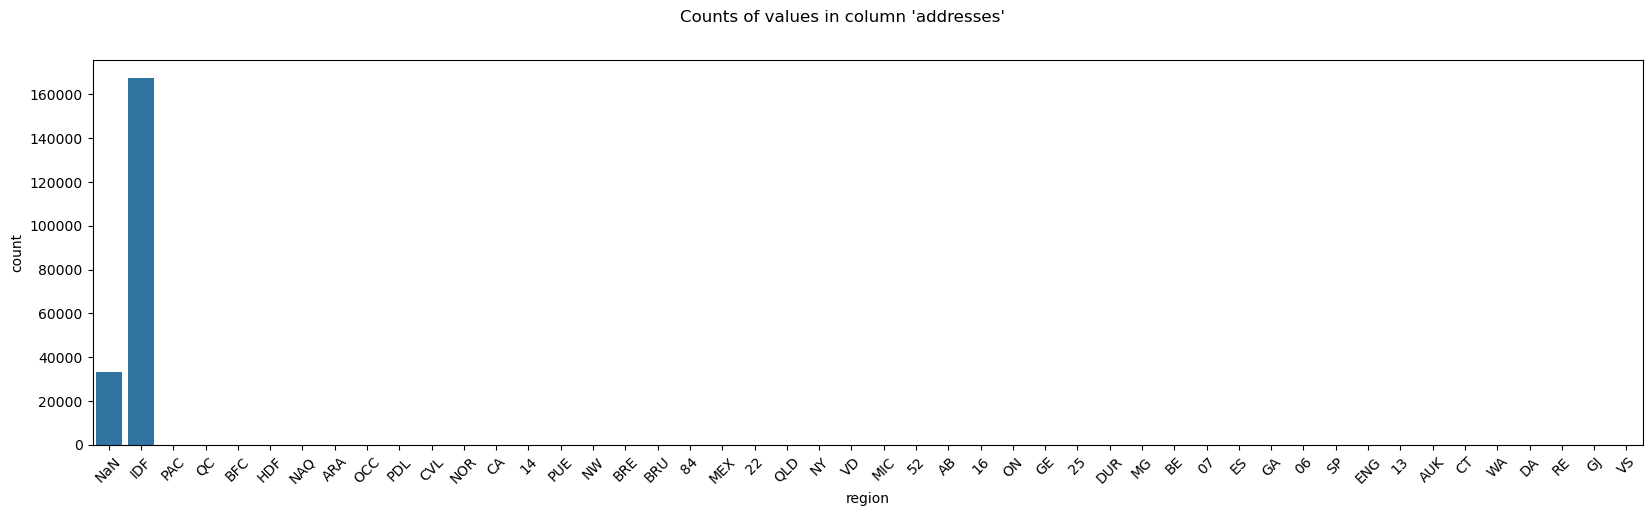

In [13]:
json_columns = ['sources', 'names', 'categories', 'addresses']
for col in json_columns:
    print(f"JSON Column: '{col}'")
    df_extracted = parse.extract_all_values_column(df_places, column=col, unpack_lists=True)
    ax = plot_counts(data=df_extracted, sup_title=f"Counts of values in column '{col}'", fillna=True, max_cardinality=50)

Columns with cardinality > 50 will not be displayed:
ogc_fid         129285
wkb_geometry    126242
id              129285
websites         88540
socials         129282
phones          107508
brand             2460
dtype: int64 
Plotting counts for columns: ['version', 'update_time', 'confidence']


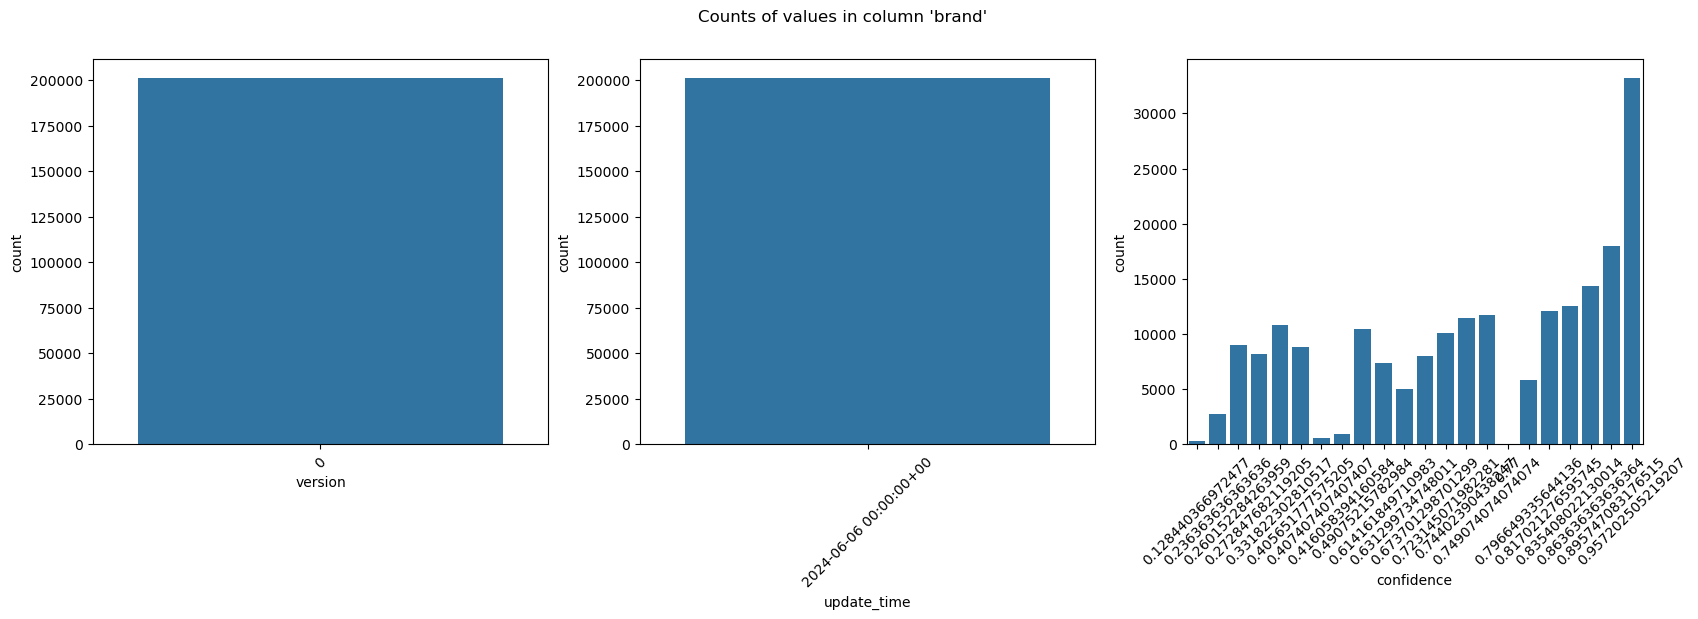

In [16]:
non_json_columns =  [col for col in df_places.columns if col not in json_columns]
ax = plot_counts(data=df_places[non_json_columns], sup_title=f"Counts of values in column '{col}'", fillna=True, max_cardinality=50)

<Axes: xlabel='confidence', ylabel='Count'>

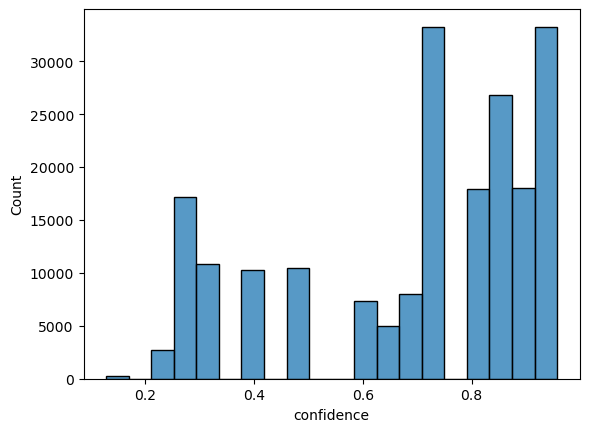

In [17]:
sns.histplot(df_places.confidence, bins=20)